# Steps to Train and Evaluate a SVM Model

## Import the Required Libraries:

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

## Generate a Synthetic Dataset:

In [7]:
#X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42)

In [8]:
# n_features >= n_informative + n_redundant + n_repeated

In [9]:
X, y = make_classification(
    n_samples=100,        # Total number of samples
    n_features=2,         # Total number of features
    n_informative=2,      # Number of informative features (Default = 2)
    n_redundant=0,        # Number of redundant features (Default = 2)
    n_repeated=0,         # Number of repeated features (Default = 0)
    n_classes=2,          # Number of target classes
    n_clusters_per_class=1, # Number of clusters per class
    random_state=42       # For reproducibility
)

In [10]:
X.shape

(100, 2)

In [11]:
y.shape

(100,)

## Split the Dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train an SVM Model: Linear

In [15]:
model = SVC(kernel='linear', C=1.0, gamma='scale')  # Using 'linear' Kernel
model.fit(X_train, y_train)

SVC(kernel='linear')

## Make Predictions:

In [17]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1]


## Evaluate the Model:

In [19]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[15  0]
 [ 0 15]]


## Visualization

In [20]:
# A function for visualization of Model result
def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
                linestyles=['--', '-', '--'])
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

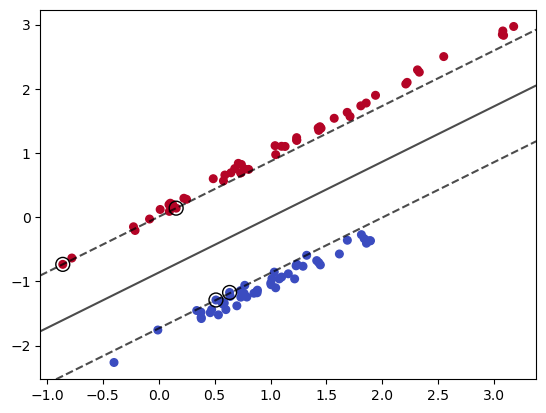

In [21]:
plot_decision_boundary(X, y, model)

## Train an SVM Model: RBF

In [47]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC()

## Make Prediction

In [50]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1]


## Evaluate the Model:

In [53]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[15  0]
 [ 0 15]]


## Visualization

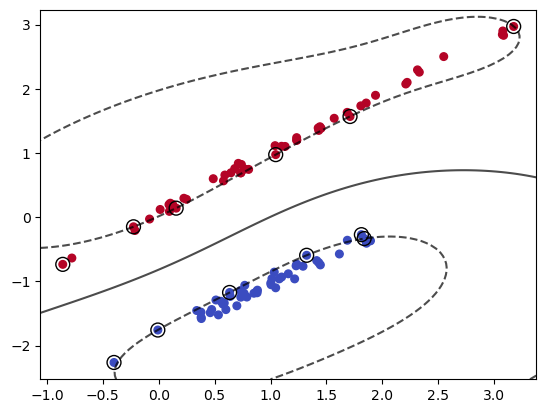

In [56]:
plot_decision_boundary(X, y, model)

## Train an SVM Model: Polynomial

In [61]:
model = SVC(kernel='poly', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC(kernel='poly')

## Make Prediction

In [64]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1]


## Evaluate the Model:

In [67]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[15  0]
 [ 0 15]]


## Visualization

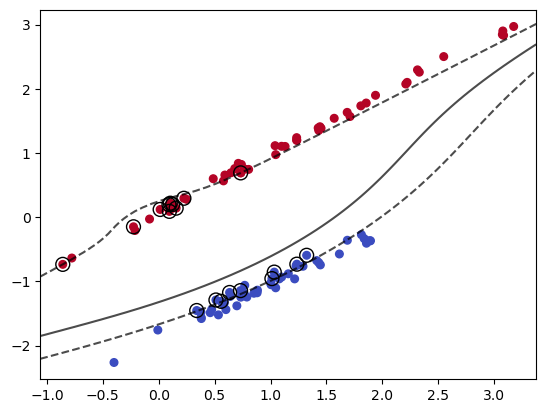

In [70]:
plot_decision_boundary(X, y, model)

## Train an SVM Model: Sigmoid

In [74]:
model = SVC(kernel='sigmoid', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC(kernel='sigmoid')

## Make Prediction

In [77]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0]


## Evaluate the Model:

In [79]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.87      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

[[14  1]
 [ 2 13]]


## Visualization

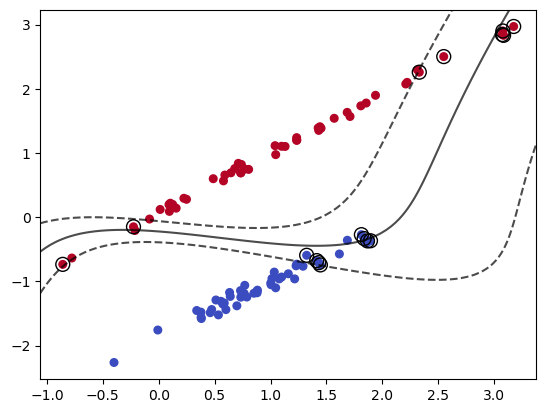

In [81]:
plot_decision_boundary(X, y, model)